In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gdp = pd.read_csv('https://raw.githubusercontent.com/mdibble2/Thinkful-assignments/master/GDPC1.csv')
gdp.head()
#GDP is in billions of USD

,DATE,GDPC1
0,1947-01-01,2033.061
1,1947-04-01,2027.639
2,1947-07-01,2023.452
3,1947-10-01,2055.103
4,1948-01-01,2086.017


In [3]:
gdp.describe()

,GDPC1
count,292.000000
mean,8683.839757
std,5154.251617
min,2023.452000
25%,4100.799500
50%,7119.439000
75%,13285.640250
max,19221.970000


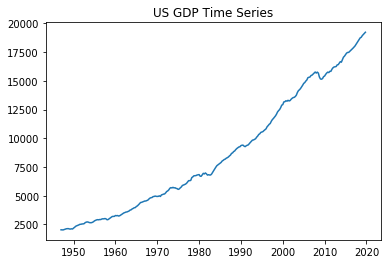

In [14]:
date = pd.to_datetime(gdp.DATE)
plt.plot(date,gdp.GDPC1)
plt.title('US GDP Time Series');

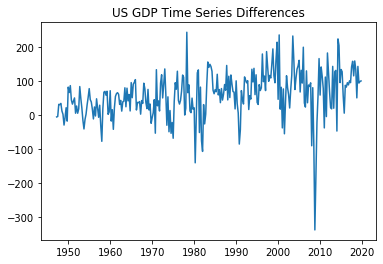

In [15]:
#plot differences
gdp['diff_1'] = gdp.GDPC1 - gdp.GDPC1.shift()
plt.plot(date,gdp.diff_1)
plt.title('US GDP Time Series Differences')
plt.show()

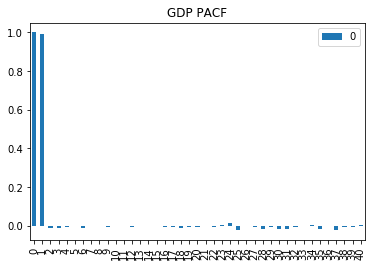

In [20]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(gdp.GDPC1))
x_acf.plot(kind='bar')
plt.title("GDP PACF");

There is an outlier at position 1

In [21]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(gdp.GDPC1, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.GDPC1   No. Observations:                  291
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1642.012
Method:                           css   S.D. of innovations             68.287
Date:                Thu, 16 Apr 2020   AIC                           3288.024
Time:                        09:06:21   BIC                           3295.371
Sample:                             1   HQIC                          3290.967
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.0684      4.003     14.756      0.000      51.223      66.914
Residuals Description
count    2.910000e+02
mean     5.000658e-14
std      6.840428e+01
min     -3.980734e+02
25%     -3.944642e+01

In [22]:
model2 = ARIMA(gdp.GDPC1, order=(1,0,0))
model_fit2 = model2.fit()
print(model_fit2.summary())
print('Residuals Description')
print(model_fit2.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  GDPC1   No. Observations:                  292
Model:                     ARMA(1, 0)   Log Likelihood               -1738.125
Method:                       css-mle   S.D. of innovations             90.134
Date:                Thu, 16 Apr 2020   AIC                           3482.250
Time:                        09:07:31   BIC                           3493.280
Sample:                             0   HQIC                          3486.668
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8683.8416        nan        nan        nan         nan         nan
ar.L1.GDPC1     1.0000        nan        nan        nan         nan         nan
                                    Roots       

/Users/megandibble/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/Users/megandibble/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/megandibble/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/megandibble/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [23]:
model3 = ARIMA(gdp.GDPC1, order=(1,1,0))
model_fit3 = model3.fit()
print(model_fit3.summary())
print('Residuals Description')
print(model_fit3.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.GDPC1   No. Observations:                  291
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1614.584
Method:                       css-mle   S.D. of innovations             62.124
Date:                Thu, 16 Apr 2020   AIC                           3235.167
Time:                        09:08:47   BIC                           3246.187
Sample:                             1   HQIC                          3239.582
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            59.0133      6.206      9.509      0.000      46.849      71.177
ar.L1.D.GDPC1     0.4146      0.053      7.777      0.000       0.310       0.519
                                    Root

In [24]:
model4 = ARIMA(gdp.GDPC1, order=(1,1,1))
model_fit4 = model4.fit()
print(model_fit4.summary())
print('Residuals Description')
print(model_fit4.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.GDPC1   No. Observations:                  291
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1608.660
Method:                       css-mle   S.D. of innovations             60.864
Date:                Thu, 16 Apr 2020   AIC                           3225.320
Time:                        09:10:39   BIC                           3240.014
Sample:                             1   HQIC                          3231.207
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            58.9443      8.283      7.116      0.000      42.710      75.178
ar.L1.D.GDPC1     0.7483      0.077      9.739      0.000       0.598       0.899
ma.L1.D.GDPC1    -0.4112      0.104     

In [25]:
model5 = ARIMA(gdp.GDPC1, order=(2,2,2))
model_fit5 = model5.fit()
print(model_fit5.summary())
print('Residuals Description')
print(model_fit5.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D2.GDPC1   No. Observations:                  290
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1599.785
Method:                       css-mle   S.D. of innovations             59.712
Date:                Thu, 16 Apr 2020   AIC                           3211.571
Time:                        09:11:14   BIC                           3233.590
Sample:                             2   HQIC                          3220.393
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2784      0.075      3.695      0.000       0.131       0.426
ar.L1.D2.GDPC1     0.3022      0.307      0.986      0.325      -0.299       0.903
ar.L2.D2.GDPC1     0.1589      0.119

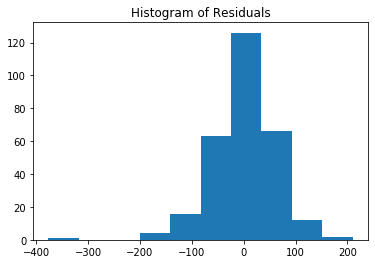

In [29]:
#order 2,2,2 has the lowest AIC
#check assumptions of residuals

plt.hist(model_fit5.resid)
plt.title('Histogram of Residuals');
#relatively normal

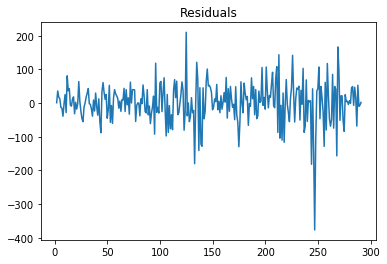

In [33]:
plt.plot(model_fit5.resid)
plt.title('Residuals');

In [37]:
def infoloss(aic1,aic2):
    return np.exp((aic1-aic2)/2)

print(infoloss(model_fit5.aic, model_fit.aic))
print(infoloss(model_fit5.aic, model_fit2.aic))
print(infoloss(model_fit5.aic, model_fit3.aic))
print(infoloss(model_fit5.aic, model_fit4.aic))

2.502938658682446e-17
1.6706846646774124e-59
7.518525929610396e-06
0.001033584874628221


All probabilities are small, so model 5 has the least information loss

Interpreting the ARIMA (2,2,2) model

In [38]:
print(model_fit5.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.GDPC1   No. Observations:                  290
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1599.785
Method:                       css-mle   S.D. of innovations             59.712
Date:                Thu, 16 Apr 2020   AIC                           3211.571
Time:                        09:18:36   BIC                           3233.590
Sample:                             2   HQIC                          3220.393
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2784      0.075      3.695      0.000       0.131       0.426
ar.L1.D2.GDPC1     0.3022      0.307      0.986      0.325      -0.299       0.903
ar.L2.D2.GDPC1     0.1589      0.119

Need help with interpretation...     
AR1 coefficient is .30?